# ベイズ更新

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
plt.style.use("ggplot")

In [4]:
# parameters
p_a = 3.0 / 10.0
p_b = 5.0 / 9.0
p_prior = 0.5   # 事前分布
# 0:blue, 1:red
data = [0,1,0,0,1,1,1]

In [26]:
N_data = 7  # 更新
likehoot_a = bernoulli.pmf(data[:N_data], p_a)  # 尤度
likehoot_b = bernoulli.pmf(data[:N_data], p_b)

In [27]:
likehoot_a

array([0.7, 0.3, 0.7, 0.7, 0.3, 0.3, 0.3])

([<matplotlib.axis.XTick at 0x1680e2cd0>,
 [Text(0, 0, 'a'), Text(1, 0, 'b')])

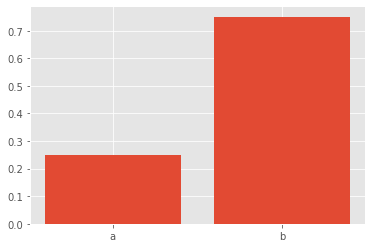

In [28]:
pa_posterior = p_prior
pb_posterior = p_prior

pa_posterior *= np.prod(likehoot_a) # 尤度の積
pb_posterior *= np.prod(likehoot_b)

norm = pa_posterior + pb_posterior  # 規格化定数

df = pd.DataFrame([pa_posterior/norm, pb_posterior/norm], columns=["post"])
x = np.arange(df.shape[0])
plt.bar(x,df["post"])
plt.xticks(x,["a","b"])